<a href="https://colab.research.google.com/github/Rishav273/Ineuron-Assignments/blob/main/Decision_tree_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 
import sklearn 
from pandas import Series, DataFrame 
from pylab import rcParams 
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
url= "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv" 
titanic = pd.read_csv(url) 
titanic.columns =  ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA:

In [4]:
# Checking target variable:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can fill the missing values in the age column with the mode(max occuring value).

In [5]:
# Imputing the mode for age column:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

In [6]:
# Checkng the data once again:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
columns_to_use = ['Pclass','Sex','Age','SibSp','Parch','Fare']

In [8]:
# Splitting train and test data:
X = titanic[columns_to_use]   # feature columns
y = titanic['Survived']       # target

In [9]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [10]:
X['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

We need to convert the Sex column to numerical format. We do this by one hot encoding the values.

In [11]:
X_final = pd.get_dummies(X,drop_first=True)
X_final.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


In [12]:
X.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [13]:
y.isnull().sum()

0

In [14]:
X['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

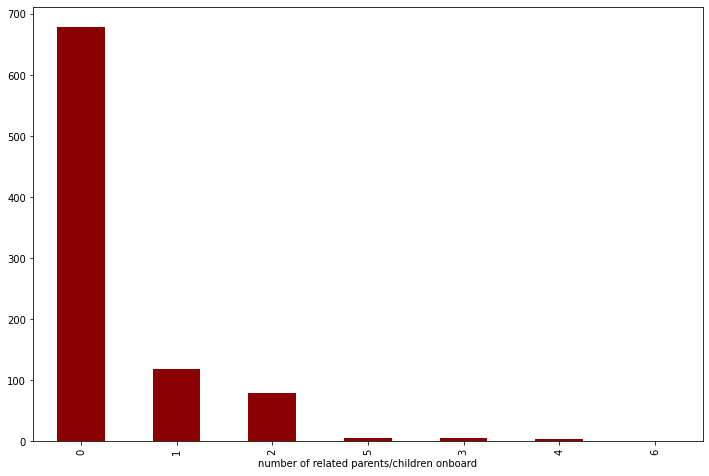

In [15]:
X['Parch'].value_counts().plot.bar(color='darkred',figsize=(12,8))
plt.xlabel("number of related parents/children onboard")
plt.show()

In [18]:
# Splitting data:

X_train, X_test, y_train, y_test = train_test_split(X_final,y,test_size=0.2,random_state=42)

In [19]:
# Feature scaling:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [25]:
# Decision Tree:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

d_tree = DecisionTreeClassifier()

# Creating the paramgrid for hyperparameter tuning:
param_dist = {"max_depth":[2,4,6,8,10,12],
              "min_samples_split":[4,6,8,10,12,15,30],
              "criterion":["gini","entropy"]}

r_search = RandomizedSearchCV(estimator=d_tree,param_distributions=param_dist,
                              cv=5)

r_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [26]:
print('Best Score: %s' % r_search.best_score_)
print('Best Hyperparameters: %s' % r_search.best_params_)
print('Best Hyperparameters: %s' % r_search.best_estimator_)

Best Score: 0.8159854230276766
Best Hyperparameters: {'min_samples_split': 6, 'max_depth': 4, 'criterion': 'entropy'}
Best Hyperparameters: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [27]:
# Instantiating the best estimator as our model of choice:
tree_model = r_search.best_estimator_

# Fitting:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
# Making predictions:
pred = tree_model.predict(X_test)

In [30]:
print("Classification report: \n\n",classification_report(y_test,pred))

Classification report: 

               precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



Since we have a more or less balanced test set we can take accuracy as an appropriate metric. The decision tree classifier gives approx 80% accuracy, with considerably high and comparable precision,recall and f1 scores.  